# Manipulating DataFrames with pandas

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# setting plot defatult size
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 6)

Populating the interactive namespace from numpy and matplotlib


## 1. Extracting and transforming data

In [3]:
df = pd.read_csv('data/election2012.csv')
df = df.loc[df.state == 'PA']
df.head()

,state,county,Obama,Romney,winner,total,margin,turnout
2957,PA,Adams,35.5,63.1,Romney,41383,27.6,1.4
2958,PA,Allegheny,56.6,42.2,Obama,607455,14.4,1.2
2959,PA,Armstrong,30.7,67.9,Romney,27925,37.2,1.4
2960,PA,Beaver,46.0,52.6,Romney,78951,6.6,1.4
2961,PA,Bedford,22.1,77.0,Romney,21239,54.9,0.9


### indexing & slicing

In [4]:
election = df.set_index('county')
election.head()

,state,Obama,Romney,winner,total,margin,turnout
county,,,,,,,
Adams,PA,35.5,63.1,Romney,41383,27.6,1.4
Allegheny,PA,56.6,42.2,Obama,607455,14.4,1.2
Armstrong,PA,30.7,67.9,Romney,27925,37.2,1.4
Beaver,PA,46.0,52.6,Romney,78951,6.6,1.4
Bedford,PA,22.1,77.0,Romney,21239,54.9,0.9


In [5]:
p_counties = election.loc['Perry':'Potter']
p_counties

,state,Obama,Romney,winner,total,margin,turnout
county,,,,,,,
Perry,PA,29.8,68.6,Romney,17941,38.8,1.6
Philadelphia,PA,85.2,14.1,Obama,648864,71.1,0.7
Pike,PA,43.9,54.9,Romney,22883,11.0,1.2
Potter,PA,26.3,72.2,Romney,7091,45.9,1.5


In [6]:
p_counties = election.loc['Potter':'Perry':-1]   # reverse
p_counties

,state,Obama,Romney,winner,total,margin,turnout
county,,,,,,,
Potter,PA,26.3,72.2,Romney,7091,45.9,1.5
Pike,PA,43.9,54.9,Romney,22883,11.0,1.2
Philadelphia,PA,85.2,14.1,Obama,648864,71.1,0.7
Perry,PA,29.8,68.6,Romney,17941,38.8,1.6


### filtering

In [7]:
turnout_df = election[election['turnout'] < 1]
turnout_df

,state,Obama,Romney,winner,total,margin,turnout
county,,,,,,,
Bedford,PA,22.1,77.0,Romney,21239,54.9,0.9
Philadelphia,PA,85.2,14.1,Obama,648864,71.1,0.7


In [8]:
low_margin = election[(election.margin < 3) & (election.turnout < 3)]   # or = |
low_margin

,state,Obama,Romney,winner,total,margin,turnout
county,,,,,,,
Berks,PA,48.9,49.5,Romney,160752,0.6,1.6
Bucks,PA,50.0,48.8,Obama,315474,1.2,1.2
Centre,PA,48.9,49.0,Romney,67374,0.1,2.1
Chester,PA,49.2,49.7,Romney,245512,0.5,1.1
Mercer,PA,48.0,50.6,Romney,47386,2.6,1.4


In [9]:
# 득표율 차이가 3% 이내이면 winner 를 NULL 처리.
too_close_row = election['margin'] < 3
election.loc[too_close_row, 'winner'] = np.nan
election.info()

<class 'pandas.core.frame.DataFrame'>
Index: 67 entries, Adams to York
Data columns (total 7 columns):
state      67 non-null object
Obama      67 non-null float64
Romney     67 non-null float64
winner     62 non-null object
total      67 non-null int64
margin     67 non-null float64
turnout    67 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 6.7+ KB


In [10]:
election['winner'].value_counts()

Romney    51
Obama     11
Name: winner, dtype: int64

## Trasforming DataFrames : apply()

In [11]:
# test data
sales = pd.DataFrame({'month':['Jan','Feb','Mar','Apr','May','Jun'],
                  'eggs':[47,110,226,82,132,210],
                  'salt':[12,50,89,87,np.nan,60],
                  'spam':[17,31,72,20,52,55]})
sales = sales.set_index('month')
sales

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,226,89.0,72
Apr,82,87.0,20
May,132,NaN,52
Jun,210,60.0,55


In [12]:
# convert to dozon unit function
def dozens(n):
    return n//12

In [13]:
sales.apply(dozens)

,eggs,salt,spam
month,,,
Jan,3,1.0,1
Feb,9,4.0,2
Mar,18,7.0,6
Apr,6,7.0,1
May,11,NaN,4
Jun,17,5.0,4


In [14]:
sales.apply(lambda n: n//12)

,eggs,salt,spam
month,,,
Jan,3,1.0,1
Feb,9,4.0,2
Mar,18,7.0,6
Apr,6,7.0,1
May,11,NaN,4
Jun,17,5.0,4


In [15]:
sales['dozen_spam'] = sales.spam.apply(dozens)
sales['salty_spam'] = sales.salt + sales.spam
sales

,eggs,salt,spam,dozen_spam,salty_spam
month,,,,,
Jan,47,12.0,17,1,29.0
Feb,110,50.0,31,2,81.0
Mar,226,89.0,72,6,161.0
Apr,82,87.0,20,1,107.0
May,132,NaN,52,4,NaN
Jun,210,60.0,55,4,115.0


### map() with a dictionary

In [16]:
red_vs_blue = {'Obama':'blue', 'Romney':'red'}
election['color'] = election.winner.map(red_vs_blue)

election.head()

,state,Obama,Romney,winner,total,margin,turnout,color
county,,,,,,,,
Adams,PA,35.5,63.1,Romney,41383,27.6,1.4,red
Allegheny,PA,56.6,42.2,Obama,607455,14.4,1.2,blue
Armstrong,PA,30.7,67.9,Romney,27925,37.2,1.4,red
Beaver,PA,46.0,52.6,Romney,78951,6.6,1.4,red
Bedford,PA,22.1,77.0,Romney,21239,54.9,0.9,red


In [17]:
from scipy.stats import zscore

In [18]:
turnout_zscore = zscore(election['turnout'])    # z-score
election['turnout_zscore'] = turnout_zscore
election.tail()

,state,Obama,Romney,winner,total,margin,turnout,color,turnout_zscore
county,,,,,,,,,
Washington,PA,42.7,56.0,Romney,88958,13.3,1.3,red,-0.507754
Wayne,PA,38.8,59.8,Romney,20669,21.0,1.4,red,-0.133913
Westmoreland,PA,37.6,61.3,Romney,166809,23.7,1.1,red,-1.255436
Wyoming,PA,42.9,55.2,Romney,11001,12.3,1.9,red,1.735292
York,PA,38.7,59.9,Romney,183702,21.2,1.4,red,-0.133913


### Change Index

In [19]:
sales.index = [idx.upper() for idx in sales.index]
sales.head(3)

,eggs,salt,spam,dozen_spam,salty_spam
JAN,47,12.0,17,1,29.0
FEB,110,50.0,31,2,81.0
MAR,226,89.0,72,6,161.0


In [20]:
sales.index.name = 'MONTHS'
sales.head(3)

,eggs,salt,spam,dozen_spam,salty_spam
MONTHS,,,,,
JAN,47,12.0,17,1,29.0
FEB,110,50.0,31,2,81.0
MAR,226,89.0,72,6,161.0


### Hierarchical indexing / multi index

In [21]:
# make test data
sales = pd.DataFrame({'state':['CA','CA','TX','TX','NY','NY'], 'month':[1,2,1,2,1,2], 'eggs':[47,110,221,77,69,88], 
                      'salt':[12,50,89,87,73,49], 'spam':[17,31,72,20,37,56]})
sales

,state,month,eggs,salt,spam
0,CA,1,47,12,17
1,CA,2,110,50,31
2,TX,1,221,89,72
3,TX,2,77,87,20
4,NY,1,69,73,37
5,NY,2,88,49,56


In [22]:
sales2 = sales.set_index(['state','month'])   # multi index
sales2

eggs  salt  spam
state month                  
CA    1        47    12    17
      2       110    50    31
TX    1       221    89    72
      2        77    87    20
NY    1        69    73    37
      2        88    49    56

In [23]:
sales2.index      # 인덱스 정보 조회

MultiIndex(levels=[['CA', 'NY', 'TX'], [1, 2]],
           codes=[[0, 0, 2, 2, 1, 1], [0, 1, 0, 1, 0, 1]],
           names=['state', 'month'])

In [24]:
sales2.loc[('NY', 1)]

eggs    69
salt    73
spam    37
Name: (NY, 1), dtype: int64

In [25]:
sales2.loc['CA']

,eggs,salt,spam
month,,,
1,47,12,17
2,110,50,31


## 2. Rearranging and reshaping data

### Pivot / Stack & Unstack

In [26]:
sales = pd.DataFrame({'weekday':['Sun','Sun','Mon','Mon'],
                  'item':['egg','spam','egg','spam'],
                  'sold':[120,250,189,187],
                  'retail':[17,31,72,20]})
sales

,weekday,item,sold,retail
0,Sun,egg,120,17
1,Sun,spam,250,31
2,Mon,egg,189,72
3,Mon,spam,187,20


In [27]:
pivot_sold = sales.pivot(index='weekday', columns='item', values='sold')
pivot_sold

item,egg,spam
weekday,,
Mon,189,187
Sun,120,250


In [28]:
pivot_sales = sales.pivot(index='weekday', columns='item')
pivot_sales

sold      retail     
item     egg spam    egg spam
weekday                      
Mon      189  187     72   20
Sun      120  250     17   31

### stack & unstack : [참조블로그](http://rfriend.tistory.com/276)

In [29]:
sales = sales.set_index(['weekday','item'])
sales

sold  retail
weekday item              
Sun     egg    120      17
        spam   250      31
Mon     egg    189      72
        spam   187      20

In [30]:
byweekday = sales.unstack(level='weekday')
byweekday

sold      retail    
weekday  Mon  Sun    Mon Sun
item                        
egg      189  120     72  17
spam     187  250     20  31

In [31]:
byweekday.stack(level='weekday')

sold  retail
item weekday              
egg  Mon       189      72
     Sun       120      17
spam Mon       187      20
     Sun       250      31

In [32]:
byitem = sales.unstack(level='item')
byitem

sold      retail     
item     egg spam    egg spam
weekday                      
Mon      189  187     72   20
Sun      120  250     17   31

In [33]:
byitem.stack(level='item')

sold  retail
weekday item              
Mon     egg    189      72
        spam   187      20
Sun     egg    120      17
        spam   250      31

### Melting DataFrames : [참조블로그](http://rfriend.tistory.com/278)

In [34]:
sales = pd.DataFrame({'weekday':['Sun','Sun','Mon','Mon'],
                  'item':['egg','spam','egg','spam'],
                  'sold':[120,250,189,187],
                  'retail':[17,31,72,20]})
sales

,weekday,item,sold,retail
0,Sun,egg,120,17
1,Sun,spam,250,31
2,Mon,egg,189,72
3,Mon,spam,187,20


In [35]:
sales2 = pd.melt(sales, id_vars=['weekday'], value_name='value')
sales2

,weekday,variable,value
0,Sun,item,egg
1,Sun,item,spam
2,Mon,item,egg
3,Mon,item,spam
4,Sun,sold,120
5,Sun,sold,250
6,Mon,sold,189
7,Mon,sold,187
8,Sun,retail,17
9,Sun,retail,31


In [36]:
sales3 = pd.melt(sales, id_vars=['weekday','item'])
sales3

,weekday,item,variable,value
0,Sun,egg,sold,120
1,Sun,spam,sold,250
2,Mon,egg,sold,189
3,Mon,spam,sold,187
4,Sun,egg,retail,17
5,Sun,spam,retail,31
6,Mon,egg,retail,72
7,Mon,spam,retail,20


In [37]:
kv_pairs = pd.melt(sales, col_level=0)
kv_pairs.tail()

,variable,value
11,sold,187
12,retail,17
13,retail,31
14,retail,72
15,retail,20


### pivot_table & aggregation

In [38]:
sales

,weekday,item,sold,retail
0,Sun,egg,120,17
1,Sun,spam,250,31
2,Mon,egg,189,72
3,Mon,spam,187,20


In [39]:
by_item_day = sales.pivot_table(index='weekday', columns='item')
by_item_day

retail      sold     
item       egg spam  egg spam
weekday                      
Mon         72   20  189  187
Sun         17   31  120  250

In [40]:
sales.pivot_table(index='weekday', aggfunc=sum)

,retail,sold
weekday,,
Mon,92,376
Sun,48,370


In [41]:
sales.pivot_table(index='weekday', aggfunc=sum, margins=True)   # All 포함.

,retail,sold
weekday,,
Mon,92,376
Sun,48,370
All,140,746


## 3. Grouping data

In [42]:
titanic = pd.read_csv('data/titanic.csv')
titanic.head()

,id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [43]:
by_class = titanic.groupby('pclass')
by_class

In [44]:
by_class['survived'].count()

pclass
1    216
2    184
3    491
Name: survived, dtype: int64

In [45]:
by_class_sub = by_class[['age','fare']]
aggregated = by_class_sub.agg(['max','median','mean'])
aggregated

age                        fare                    
         max median       mean       max   median       mean
pclass                                                      
1       80.0   37.0  38.233441  512.3292  60.2875  84.154687
2       70.0   29.0  29.877630   73.5000  14.2500  20.662183
3       74.0   24.0  25.140620   69.5500   8.0500  13.675550

In [46]:
aggregated.loc[:, ('age','max')]

pclass
1    80.0
2    70.0
3    74.0
Name: (age, max), dtype: float64

In [47]:
titanic.groupby(['embarked','pclass'])['survived'].count()

embarked  pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: survived, dtype: int64

### Aggregating on index levels/fields

In [48]:
titanic_idx = pd.read_csv('data/titanic.csv', index_col=['pclass','sex']).sort_index()
titanic_idx

id  survived  \
pclass sex                     
1      female    2         1   
       female    4         1   
       female   12         1   
       female   32         1   
       female   53         1   
       female   62         1   
       female   89         1   
       female  137         1   
       female  152         1   
       female  167         1   
       female  178         0   
       female  195         1   
       female  196         1   
       female  216         1   
       female  219         1   
       female  231         1   
       female  257         1   
       female  258         1   
       female  259         1   
       female  269         1   
       female  270         1   
       female  276         1   
       female  291         1   
       female  292         1   
       female  298         0   
       female  300         1   
       female  307         1   
       female  308         1   
       female  310         1   
       female  311         1   
...            ...       ...   
3      male    825         0   
       male    826         0   
       male    827         0   
       male    829         1   
       male    833         0   
       male    834         0   
       male    835         0   
       male    837         0   
       male    838         0   
       male    839         1   
       male    841         0   
       male    844         0   
       male    845         0   
       male    846         0   
       male    847         0   
       male    848         0   
       male    851         0   
       male    852         0   
       male    860         0   
       male    861         0   
       male    869         0   
       male    870         1   
       male    871         0   
       male    874         0   
       male    877         0   
       male    878         0   
       male    879         0   
       male    882         0   
       male    885         0   
       male    891         0   

                                                            name   age  sibsp  \
pclass sex                                                                      
1      female  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1   
       female       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1   
       female                           Bonnell, Miss. Elizabeth  58.0      0   
       female     Spencer, Mrs. William Augustus (Marie Eugenie)   NaN      1   
       female           Harper, Mrs. Henry Sleeper (Myna Haxtun)  49.0      1   
       female                                Icard, Miss. Amelie  38.0      0   
       female                         Fortune, Miss. Mabel Helen  23.0      3   
       female                       Newsom, Miss. Helen Monypeny  19.0      0   
       female                  Pears, Mrs. Thomas (Edith Wearne)  22.0      1   
       female             Chibnall, Mrs. (Edith Martha Bowerman)   NaN      0   
       female                         Isham, Miss. Ann Elizabeth  50.0      0   
       female          Brown, Mrs. James Joseph (Margaret Tobin)  44.0      0   
       female                               Lurette, Miss. Elise  58.0      0   
       female                            Newell, Miss. Madeleine  31.0      1   
       female                              Bazzani, Miss. Albina  32.0      0   
       female       Harris, Mrs. Henry Birkhardt (Irene Wallach)  35.0      1   
       female                     Thorne, Mrs. Gertrude Maybelle   NaN      0   
       female                               Cherry, Miss. Gladys  30.0      0   
       female                                   Ward, Miss. Anna  35.0      0   
       female      Graham, Mrs. William Thompson (Edith Junkins)  58.0      0   
       female                             Bissette, Miss. Amelia  35.0      0   
       female                  Andrews, Miss. Kornelia Theodosia  63.0      1   
       female                       Barber, Miss. Ellen

In [49]:
by_grp1 = titanic_idx.groupby(level=['pclass','sex'])
by_grp1

In [50]:
# Define the function to compute spread
def spread(series):
    return series.max() - series.min()

In [51]:
# Aggregate by using the dictionary
aggregator = {'survived':'sum', 'age':'mean', 'fare':spread}
aggr = by_grp1.agg(aggregator)
aggr

survived        age      fare
pclass sex                                  
1      female        91  34.611765  486.4000
       male          45  41.281386  512.3292
2      female        70  28.722973   54.5000
       male          17  30.740707   73.5000
3      female        72  21.750000   62.8000
       male          47  26.507589   69.5500

### Grouping on a function of the index

In [52]:
# make test data
dates = pd.date_range('20161001', periods=30)
df = pd.DataFrame(np.random.rand(30,3).round(2), index=dates, columns=list('ABC'))
df.index.name = 'Date'
df.head()

,A,B,C
Date,,,
2016-10-01,0.78,0.82,0.59
2016-10-02,0.07,0.95,0.71
2016-10-03,0.25,0.22,0.73
2016-10-04,0.55,0.77,0.72
2016-10-05,0.43,0.78,0.09


In [53]:
by_day = df.groupby(df.index.strftime('%a'))
by_day['C'].sum()

Fri    2.27
Mon    2.50
Sat    2.48
Sun    2.27
Thu    1.79
Tue    2.14
Wed    1.68
Name: C, dtype: float64

### Detecting outliers with Z-Scores

In [54]:
from scipy.stats import zscore

In [55]:
import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [56]:
cars = pd.read_csv('data/automobile.csv')
cars.head()

,symboling,normalized_losses,maker,fuel,aspiration,doors,body,wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


In [57]:
np.seterr(divide='ignore')
standardized = cars.groupby('cylinders')['city_mpg','price'].transform(zscore)
# identify outliers
outliers = (standardized['city_mpg'] < -3) | (standardized['city_mpg'] > 3)

In [58]:
cars.loc[outliers]

,symboling,normalized_losses,maker,fuel,aspiration,doors,body,wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
19,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479
60,1,128,nissan,diesel,std,two,sedan,fwd,front,94.5,...,103,idi,2.99,3.47,21.9,55,4800,45,50,7099


### Filling missing data (imputation) by group

In [59]:
titanic.tail()

,id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [60]:
# Write a function that imputes median
def impute_median(series):
    return series.fillna(series.median())

In [61]:
# grouping by sex & pclass
by_sex_class = titanic.groupby(['sex','pclass'])

In [62]:
# sex & pclass 그룹별로 median 값을 missing data에 할당
titanic['age'] = by_sex_class['age'].transform(impute_median)
titanic.tail()

,id,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.5,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


### transformations with .apply

In [63]:
def disparity(gr):
    # spread
    s = gr['fare'].max() - gr['fare'].min()
    # z-score
    z = (gr['fare'] - gr['fare'].mean())/gr['fare'].std()
    return pd.DataFrame({'zscore':z , 'spread':s})

In [64]:
by_class = titanic.groupby('pclass')
by_class['fare'].mean()

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [65]:
pgroup_disp = by_class.apply(disparity)  # 모든 row에 대해 각각 적용됨.
pgroup_disp.head()

,zscore,spread
0,-0.545549,69.5500
1,-0.164217,512.3292
2,-0.488239,69.5500
3,-0.396205,512.3292
4,-0.477626,69.5500


In [66]:
# C deck 의 생존율

In [67]:
def c_deck_survival(gr):
    c_passengers = gr['cabin'].str.startswith('C').fillna(False)
    return gr.loc[c_passengers, 'survived'].mean()

In [68]:
titanic.groupby('sex').apply(c_deck_survival)

sex
female    0.888889
male      0.343750
dtype: float64

In [69]:
# 10살 기준 생존율

In [70]:
under10 = (titanic['age'] < 10).map({True:'under 10', False:'over 10'})   # Create the Boolean Series

In [71]:
survived_mean_1 = titanic.groupby(under10)['survived'].mean()
survived_mean_1

age
over 10     0.366707
under 10    0.612903
Name: survived, dtype: float64

In [72]:
survived_mean_2 = titanic.groupby([under10, 'pclass'])['survived'].mean()
survived_mean_2

age       pclass
over 10   1         0.629108
          2         0.419162
          3         0.222717
under 10  1         0.666667
          2         1.000000
          3         0.452381
Name: survived, dtype: float64

## 4. Excercise

[Olympic medals dataset](https://www.theguardian.com/sport/datablog/2012/jun/25/olympic-medal-winner-list-data)

In [73]:
medals = pd.read_csv('data/olympic_medals.csv')
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [74]:
# 국가별 메달 합계
medals['NOC'].value_counts()[0:10]

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
GER    1211
AUS    1075
HUN    1053
SWE    1021
GDR     825
Name: NOC, dtype: int64

In [75]:
# count medals by type

In [76]:
counted = medals.pivot_table(index='NOC', values='Athlete', columns='Medal', aggfunc='count')
counted['totals'] = counted.sum(axis='columns')   # Create the new column
counted = counted.sort_values('totals', ascending=False)
counted.head()

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0


In [77]:
# drop_duplicates

In [78]:
ev_gen = medals[['Event_gender', 'Gender']]
ev_gen_uniques = ev_gen.drop_duplicates()
ev_gen_uniques

,Event_gender,Gender
0,M,Men
348,X,Men
416,W,Women
639,X,Women
23675,W,Men


In [79]:
medals_by_gender = medals.groupby(['Event_gender', 'Gender'])
medal_count_by_gender = medals_by_gender.count()
medal_count_by_gender

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

In [80]:
medals[(medals.Event_gender == 'W') & (medals.Gender == 'Men')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


In [81]:
# distinct : nunique()

In [82]:
# 국가별로 메달을 획득한 종목 수
country_grouped = medals.groupby('NOC')
Nsports = country_grouped['Sport'].nunique()
Nsports = Nsports.sort_values(ascending=False)
Nsports.head()

NOC
USA    34
GBR    31
FRA    28
GER    26
CHN    24
Name: Sport, dtype: int64

In [83]:
# USA vs. USSR

In [84]:
during_cold_war = (medals.Edition>=1952) & (medals.Edition<=1988)
is_usa_urs = medals.NOC.isin(['USA', 'URS'])

cold_war_medals = medals.loc[during_cold_war & is_usa_urs]

country_grouped = cold_war_medals.groupby('NOC')
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)
Nsports

NOC
URS    21
USA    20
Name: Sport, dtype: int64

In [85]:
medals_won_by_country = medals.pivot_table(index='Edition', columns='NOC', values='Athlete', aggfunc='count')
cold_war_usa_usr_medals = medals_won_by_country.loc[1952:1988, ['USA','URS']]   # Slice
most_medals = cold_war_usa_usr_medals.idxmax(axis='columns')
most_medals.value_counts()

URS    8
USA    2
dtype: int64

In [86]:
# USA Medal Counts by Edition

In [87]:
usa = medals[medals.NOC == 'USA']
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()

# Reshape
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

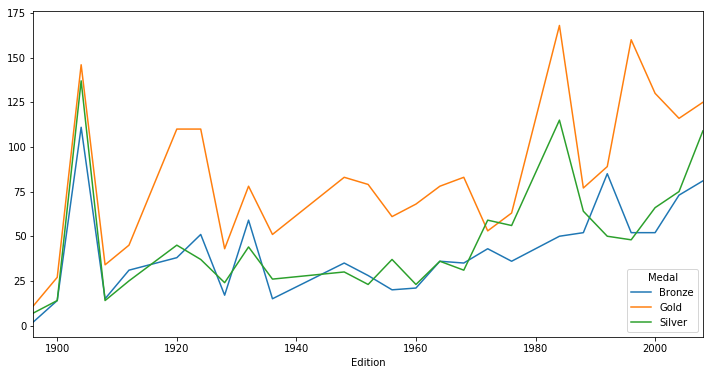

In [88]:
# Line Plot
usa_medals_by_year.plot()

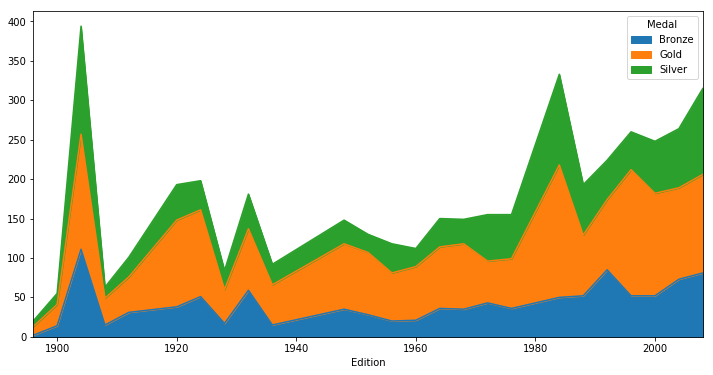

In [89]:
# Area Plot
usa_medals_by_year.plot.area()

In [90]:
# Area Plot with Ordered Medals

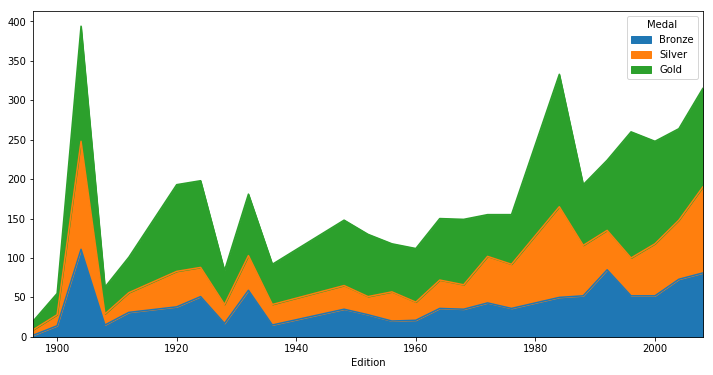

In [91]:
# Redefine 'Medal' as an ordered categorical
medals.Medal = pd.Categorical(values=medals.Medal, categories=['Bronze', 'Silver', 'Gold'], ordered=True)

# Create the DataFrame
usa = medals[medals.NOC == 'USA']
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')

usa_medals_by_year.plot.area()